##  연습문제

### 1. 데이터셋의 차원을 축소하는 주요 목적은 무엇인가요? 대표적인 단점은 무엇인가요?



특성이 많을 경우 시간이 알고리즘 계산 시간이 오래걸리기 때문이다. 너무 많은 차원을 축소할 경우 기존의 데이터의 중요 정보도 잃을 수 있다.

### 2. 차원의 저주란 무엇인가요?

관측치보다 특성이 더 많을 경우 성능이 나빠지는 것이다.(데이터의 과대적합의 위험, 데이터의 패턴을 잡기가 어렵다)

### 3. 데이터셋의 차원을 축소시키고 나서 이작업을 원복시킬수 있나요? 할 수 있다면 어떻게 가능할까요? 가능하지 않다면 왜 일까요?

차원 축소 과정에서 일부 분산이 소실되기에 이를 다시 완벽하게 돌리는것은 불가능하다.

사이킷런의 inverse_transform을 사용하여 일부를 복원하는 방법이 있다.

### 4. 매우 비선형적인 데이터셋의 차원을 축소하는데 PCA를 사용할 수 있을까요?

매우 비선형적인 데이터셋의 차원을 줄이는데 사용이 가능하다. 대신 데이터셋에 불필요한 차원이 있을 경우에 해당하며 불필요한 차원이 없을 경우 중요 정보를 잃을 수도 있다.

### 5. 설명된 분산을 95%로 지정한 PCA를 1000개의 차원을 가진 데이터셋에 적용한다고 가정하겠습니다. 결과 데이터셋의 차원은 얼마나 될까요?

데이터의 형태에 따라 결과값이 달라진다. 하나의 선형 배열 데이터라면 차원 하나로 설명이 가능하지만 여러곳에 퍼져있는 데이터라면 95%인 950개의 차원이 필요할 것이다.

### 6. 기본 PCA, 점진적PCA, 랜덤 PCA, 커널 PCA는 어느 경우에 사용될까요?

기본 PCA : 우선적으로 사용하며 메모리에 담을 수 있는 데이터셋 크기일 경우 사용한다.

점진 PCA : 메모리에 담을 수 없는 대용량 데이터에 사용한다.

랜덤 PCA : 데이터 셋이 메모리 크기에 맞고 차원을 크게 축소시킬 때 사용된다.

커널 PCA : 비선형 데이터셋에 유용하다.



### 7. 어떤 데이터셋에 적용한 차원 축소 알고리즘의 성능은 어떻게 평가할 수 있을까요?

기존의 데이터셋을 얼마나 잘 보존했냐에 따라 알고리즘의 성능이 달라진다.

평가는 역변환을 수행해서 재구성 오차를 판별하거나 차원 축소를 하기 전 성능과 하고나서의 모델 성능을 비교한다.

### 8. 두 개의 차원 축소 알고리즘을 연결할 수 있을까요?

할 수 있다.

### 9. 문제: (3장에서 소개한) MNIST 데이터셋을 로드하고 훈련 세트와 테스트 세트로 분할합니다(처음 60,000개는 훈련을 위한 샘플이고 나머지 10,000개는 테스트용입니다).

앞서 로드한 MNIST 데이터셋을 사용합니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [3]:
# mnist 데이터셋 분리
x_train = mnist.data[:60000]
y_train = mnist.target[:60000]

x_test = mnist.data[60000:]
y_test = mnist.target[60000:]

문제: 이 데이터셋에 랜덤 포레스트 분류기를 훈련시키고 얼마나 오래 걸리는지 시간을 잰 다음, 테스트 세트로 만들어진 모델을 평가합니다.

In [4]:
import time
from sklearn.ensemble import RandomForestClassifier

t1 = time.time()

# 사용한 트리 갯수 : 100
rnd = RandomForestClassifier(n_estimators=100, random_state=42)
rnd.fit(x_train,y_train)
t2 = time.time()

In [5]:
print("훈련 시간 : {}s".format(t2 - t1))

훈련 시간 : 39.606526136398315s


In [6]:
y_pred = rnd.predict(x_test)

In [7]:
from sklearn.metrics import accuracy_score

print("모델 정확도 : {}".format(accuracy_score(y_test,y_pred)))

모델 정확도 : 0.9705


문제: 그런 다음 PCA를 사용해 설명된 분산이 95%가 되도록 차원을 축소합니다.

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train)

문제: 이 축소된 데이터셋에 새로운 랜덤 포레스트 분류기를 훈련시키고 얼마나 오래 걸리는지 확인합니다. 훈련 속도가 더 빨라졌나요?

In [9]:
t1 = time.time()
rnd2 = RandomForestClassifier(n_estimators=100, random_state=42)
rnd2.fit(x_train_pca,y_train)
t2 = time.time()

In [10]:
print("훈련 시간 : {}".format(t2-t1))

훈련 시간 : 87.15528655052185


#### pca를 진행했음에도 불구하고 훈련 시간이 2배로 느려졌다. 여기서 볼 수 있듯 차원 축소를 한다고 반드시 훈련 시간이 감소하는 것은 아님을 알 수 있다.  


문제: 이제 테스트 세트에서 이 분류기를 평가해보세요. 이전 분류기와 비교해서 어떤가요?

In [11]:
x_test_pca = pca.transform(x_test)

y_pred = rnd2.predict(x_test_pca)

In [12]:
print("모델 정확도 : {}".format(accuracy_score(y_pred, y_test)))

모델 정확도 : 0.9481


#### 해당 모델에서는 PCA를 진행하는게 성능이 더 나빠졌다.

소프트맥스 회귀를 사용하면 도움이 되는지 확인해 보겠습니다:



In [13]:
from sklearn.linear_model import LogisticRegression
# 소프트맥스 회귀 사용 : 로지스틱회귀에 multi class, solver 옵션 추가
log_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", random_state = 42)
t1 = time.time()
log_reg.fit(x_train,y_train)
t2 =  time.time()

In [14]:
print("소프트맥스 훈련 시간 : ",t2 - t1)

소프트맥스 훈련 시간 :  17.401818990707397


In [15]:
y_pred = log_reg.predict(x_test)
accuracy_score(y_pred, y_test)

0.9255

PCA가 소프트맥스 회귀에 얼마나 도움이 되는지가 궁금합니다. 축소된 데이터셋에 소프트맥스 회귀 모델을 훈련시켜 보겠습니다:

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
x_train_pca = pca.fit_transform(x_train)

In [17]:
log_reg2 = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", random_state = 42)
t1 = time.time()
log_reg2.fit(x_train_pca,y_train)
t2 = time.time()

In [18]:
print("소프트맥스 훈련 시간 : ",t2 - t1)

소프트맥스 훈련 시간 :  6.308915376663208


#### 소프트맥스 회귀에서는 훈련 시간이 상당히 축소되었다.

In [19]:
x_test_pca = pca.transform(x_test)
y_pred = log_reg2.predict(x_test_pca)
accuracy_score(y_pred, y_test)

0.9201

#### 성능은 조금 줄어들었지만 훈련 시간이 크게 감소했다는것에 의의를 두면 좋을듯하다.

### 10. 문제: t-SNE 알고리즘을 사용해 MNIST 데이터셋을 2차원으로 축소시키고 맷플롯립으로 그래프를 그려보세요. 이미지의 타깃 클래스마다 10가지 색깔로 나타낸 산점도를 그릴 수 있습니다.

앞서 로드한 MNIST 데이터셋을 사용합니다.

전체 60,000개의 이미지에 차원 축소를 하면 매우 오랜 시간이 걸리므로 10,000개의 이미지만 무작위로 선택하여 사용하겠습니다:

In [26]:
np.random.seed(42)

# 10000개 무작위 추출
m = 10000
idx = np.random.permutation(60000)[:m]

# 추출한 인덱스로 mnist 10000개 추출
x = mnist['data'][idx]
y = mnist['target'][idx]

이제 t-SNE를 사용해 2D로 차원을 축소해 그래프로 나타냅니다:

In [21]:
# T-SNE 훈련 
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
t1 = time.time()
x_reduced = tsne.fit_transform(x)
t2 = time.time()

In [22]:
print("TSNE 훈련 시간 :", t2 - t1)

TSNE 훈련 시간 : 223.51699948310852



산점도를 그리기 위해 맷플롯립의 scatter() 함수를 사용합니다. 각 숫자마다 다른 색깔을 사용합니다:

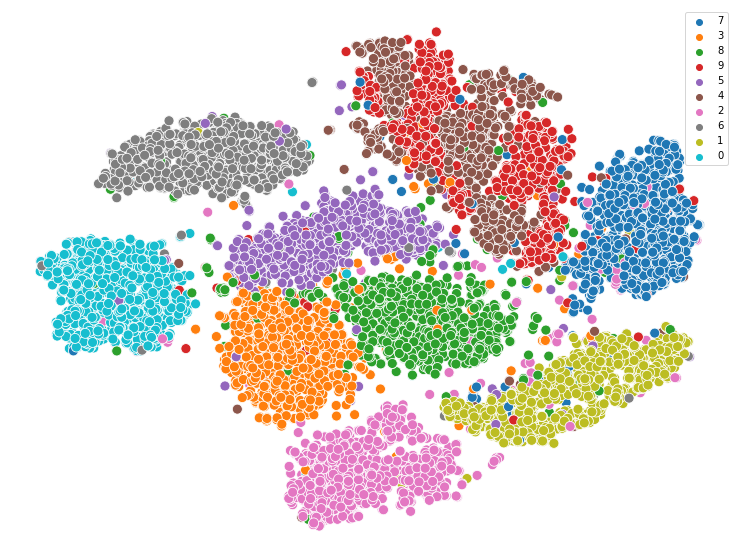

In [43]:
# TSNE 산점도
plt.figure(figsize=(13,10))
sns.scatterplot(x_reduced[:, 0], x_reduced[:, 1], hue=y, s = 100, cmap="jet")
plt.axis('off')
plt.show()

많이 겹쳐진 것 같은 숫자 2, 3, 5에 집중해 보겠습니다.

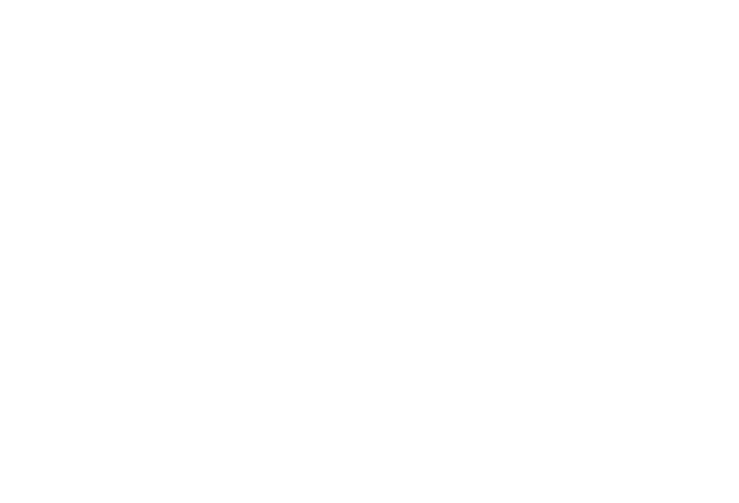

In [52]:
plt.figure(figsize=(13,9))
for digit in (2, 3, 5):
    plt.scatter(x_reduced[y == digit, 0], x_reduced[y == digit, 1])
plt.axis('off')
plt.show()


문제: 또는 샘플의 위치에 각기 다른 색깔의 숫자를 나타낼 수도 있고, 숫자 이미지 자체의 크기를 줄여서 그릴 수도 있습니다(모든 숫자를 다 그리면 그래프가 너무 복잡해지므로 무작위로 선택한 샘플만 그리거나, 인접한 곳에 다른 샘플이 그려져 있지 않은 경우에만 그립니다). 잘 분리된 숫자의 군집을 시각화할 수 있을 것입니다.


문제: PCA, LLE, MDS 같은 차원 축소 알고리즘을 적용해보고 시각화 결과를 비교해보세요.